
## WeatherPy

In this example, you'll be creating a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. To accomplish this, you'll be utilizing a simple Python library, the OpenWeatherMap API, and a little common sense to create a representative model of weather across world cities.

Your objective is to build a series of scatter plots to showcase the following relationships:

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

Your final notebook must:

* Randomly select at least 500 unique (non-repeat) cities based on latitude and longitude.
* Perform a weather check on each of the cities using a series of successive API calls.
* Include a print log of each city as it's being processed with the city number and city name.
* Save both a CSV of all data retrieved and png images for each scatter plot.

As final considerations:

* You must complete your analysis using a Jupyter notebook.
* You must use the Matplotlib or Pandas plotting libraries.
* You must include a written description of three observable trends based on the data.
* You must use proper labeling of your plots, including aspects like: Plot Titles (with date of analysis) and Axes Labels.

See Example Solution for a reference on expected format.

In [12]:
# Dependencies 
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
api_key = '<API KEY>'

# from config import api_key

# !pip install citipy
from citipy import citipy


# csv file from citipy
city_file = "worldcities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Store url and unit for API call
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

In [13]:
# make a df of the file and take a look at it
cities_df = pd.read_csv(city_file)
cities_df.head()

,Unnamed: 0


## Generate Cities List

In [14]:

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.001, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.001, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

636


In [16]:
# Print random json response for reference of where to find lat,temp,humidity,clouds
query_url = "{}appid={}&units={}&q=".format(base_url,api_key,units)

rand_response = requests.get(query_url + "olomouc").json()
print(query_url)
rand_response

http://api.openweathermap.org/data/2.5/weather?appid=cd7943573ea05d76e8f01a4eb9d7e754&units=imperial&q=


{'coord': {'lon': 17.25, 'lat': 49.59},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}],
 'base': 'stations',
 'main': {'temp': 77.88,
  'pressure': 1019,
  'humidity': 61,
  'temp_min': 73.99,
  'temp_max': 82},
 'visibility': 10000,
 'wind': {'speed': 4.7, 'deg': 60},
 'clouds': {'all': 0},
 'dt': 1561615280,
 'sys': {'type': 1,
  'id': 6842,
  'message': 0.0071,
  'country': 'CZ',
  'sunrise': 1561603533,
  'sunset': 1561662131},
 'timezone': 7200,
 'id': 3069011,
 'name': 'Olomouc',
 'cod': 200}

## Perform API Calls

* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [17]:
# Start list to store dictionaries for each city
weather_data=[]


print("Beginning Calls")
print("-------------------------")
# Start counter for number of calls
i = 0
for city in cities:
    i+=1
    try:
        print("City number {} | {}".format(i, city))
        response = requests.get(query_url + city).json()
        weather_data.append({
            "City":city,
            "Country":response["sys"]["country"],
            "Lat":response["coord"]["lat"],
            "Temp":response['main']['temp'],
            "Humidity":response["main"]["humidity"],
            "Cloudiness":response["clouds"]["all"],
            "Wind Speed":response["wind"]["speed"]
        })
    except Exception as e:
        print("City not found")

Beginning Calls
-------------------------
City number 1 | chernyshevskiy
City number 2 | louisbourg
City not found
City number 3 | grindavik
City number 4 | bailen
City number 5 | kupang
City number 6 | manggar
City number 7 | rudnogorsk
City number 8 | aklavik
City number 9 | paamiut
City number 10 | orotukan
City number 11 | chokurdakh
City number 12 | pandan
City number 13 | punta arenas
City number 14 | tasiilaq
City number 15 | tuatapere
City number 16 | cape town
City number 17 | saskylakh
City number 18 | port elizabeth
City number 19 | nanortalik
City number 20 | amderma
City not found
City number 21 | port alfred
City number 22 | saint-philippe
City number 23 | jamestown
City number 24 | chicama
City number 25 | avarua
City number 26 | simao
City number 27 | silver city
City number 28 | pevek
City number 29 | busselton
City number 30 | taolanaro
City not found
City number 31 | tacuarembo
City number 32 | derzhavinsk
City number 33 | ola
City number 34 | papara
City number 35 |

City number 285 | ulaanbaatar
City number 286 | guye
City number 287 | haibowan
City not found
City number 288 | beringovskiy
City number 289 | awjilah
City number 290 | ixtapa
City number 291 | nome
City number 292 | manado
City number 293 | locri
City number 294 | tabora
City number 295 | inhambane
City number 296 | parrita
City number 297 | san policarpo
City number 298 | izhma
City number 299 | tuktoyaktuk
City number 300 | kavieng
City number 301 | bell ville
City number 302 | talnakh
City number 303 | new castle
City number 304 | torbay
City number 305 | pilar do sul
City number 306 | saleaula
City not found
City number 307 | muros
City number 308 | claremont
City number 309 | palabuhanratu
City not found
City number 310 | port augusta
City number 311 | marawi
City number 312 | biltine
City number 313 | camacupa
City number 314 | pringsewu
City number 315 | sola
City number 316 | talcahuano
City number 317 | padang
City number 318 | wanaka
City number 319 | east london
City numbe

City number 570 | mount isa
City number 571 | kaeo
City number 572 | saint helens
City number 573 | durango
City number 574 | muravlenko
City number 575 | puerto escondido
City number 576 | coquimbo
City number 577 | carutapera
City number 578 | george
City number 579 | grand island
City number 580 | luziania
City number 581 | alice springs
City number 582 | las palmas
City number 583 | maldonado
City number 584 | umzimvubu
City not found
City number 585 | sumenep
City number 586 | sibolga
City number 587 | formoso do araguaia
City not found
City number 588 | anaconda
City number 589 | jumla
City number 590 | ozernovskiy
City number 591 | filadelfia
City number 592 | kozhevnikovo
City number 593 | biharamulo
City number 594 | ust-tsilma
City number 595 | beihai
City number 596 | kamenskoye
City not found
City number 597 | ambositra
City number 598 | ratnagiri
City number 599 | guangshui
City number 600 | vestmanna
City number 601 | trinidad
City number 602 | aksarka
City number 603 | h

### Convert Raw Data to DataFrame

* Export the city data into a .csv.
* Display the DataFrame

In [18]:
# Create df from data collected
df = pd.DataFrame(weather_data)
df = df[["City","Country", "Lat", "Temp", "Humidity", "Wind Speed","Cloudiness"]]
df.head()

,City,Country,Lat,Temp,Humidity,Wind Speed,Cloudiness
0,chernyshevskiy,RU,63.01,86.45,28,2.17,66
1,grindavik,IS,63.84,48.92,100,14.99,90
2,bailen,ES,38.10,70.00,74,5.01,64
3,kupang,ID,-10.16,87.80,43,14.99,20
4,manggar,ID,-2.88,89.15,56,8.86,29


In [19]:
# Save new df to csv file
df.to_csv(city_file)

### Plotting the Data

* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

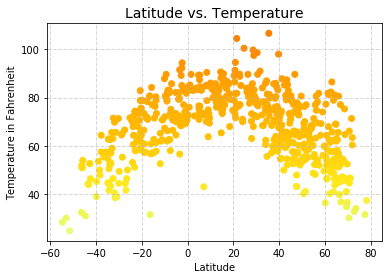

In [20]:

# create colormap 'yellow to orange' depending on temperature
# reference: https://www.robotswillkillusall.org/posts/mpl-scatterplot-colorbar.html
cmap = matplotlib.cm.get_cmap('Wistia')
normalize = matplotlib.colors.Normalize(vmin=min(df["Temp"]), vmax=max(df["Temp"]))
colors = [cmap(normalize(value)) for value in df["Temp"]]

# Create plot for Temp vs Lat
plt.scatter(
    df["Lat"],
    df["Temp"],
    marker="o",
    c= colors,
    alpha=1
)

plt.title("Latitude vs. Temperature",fontsize=14)
plt.xlabel("Latitude")
plt.ylabel("Temperature in Fahrenheit")
plt.grid(linestyle='--', linewidth=1,alpha=0.5)

# Save image
plt.savefig("lat_temp.png")

# Display plot
plt.show()

#### Latitude vs. Humidity Plot

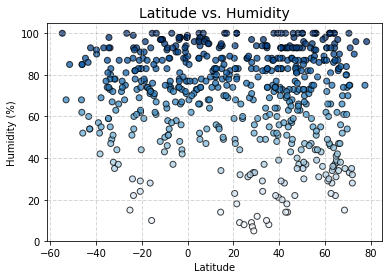

In [21]:
# Create colormap with shades of blue depending on humidity
cmap = matplotlib.cm.get_cmap('Blues')
normalize = matplotlib.colors.Normalize(vmin=min(df["Humidity"]), vmax=max(df["Humidity"]))
colors = [cmap(normalize(value)) for value in df["Humidity"]]

# Create plot for Humidity vs Lat
plt.scatter(
    df["Lat"],
    df["Humidity"],
    marker="o",
    c= colors,
    alpha=0.75,
    edgecolors="black"
)

plt.title("Latitude vs. Humidity",fontsize=14)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(linestyle='--', linewidth=1,alpha=0.5)

# Save image
plt.savefig("lat_humidity.png")

# Display plot
plt.show()

#### Latitude vs. Cloudiness Plot

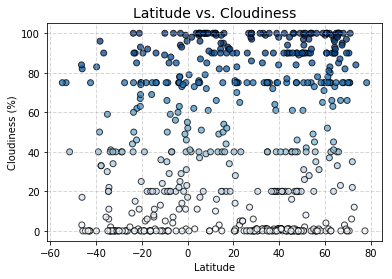

In [22]:
# Colormap also with shades of blue depending on cloudiness
cmap = matplotlib.cm.get_cmap('Blues')
normalize = matplotlib.colors.Normalize(vmin=min(df["Cloudiness"]), vmax=max(df["Cloudiness"]))
colors = [cmap(normalize(value)) for value in df["Cloudiness"]]

# Create plot for Cloudiness vs Lat
plt.scatter(
    df["Lat"],
    df["Cloudiness"],
    marker="o",
    c= colors,
    alpha=0.75,
    edgecolors="black"
)

plt.title("Latitude vs. Cloudiness",fontsize=14)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(linestyle='--', linewidth=1,alpha=0.5)

# Save image
plt.savefig("lat_cloudiness.png")

# Display plot
plt.show()

#### Latitude vs. Wind Speed Plot

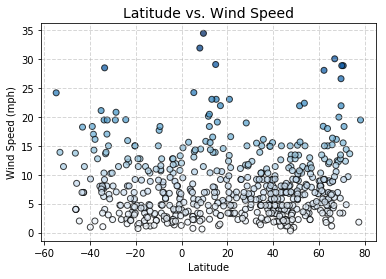

In [23]:

# Colormap also with shades of blue depending on cloudiness
cmap = matplotlib.cm.get_cmap('Blues')
normalize = matplotlib.colors.Normalize(vmin=min(df["Wind Speed"]), vmax=max(df["Wind Speed"]))
colors = [cmap(normalize(value)) for value in df["Wind Speed"]]

# Create plot for Wind Speed vs Lat
plt.scatter(
    df["Lat"],
    df["Wind Speed"],
    marker="o",
    c= colors,
    alpha=0.75,
    edgecolor="black"
)

plt.title("Latitude vs. Wind Speed",fontsize=14)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(linestyle='--', linewidth=1,alpha=0.5)

# Save image
plt.savefig("lat_wind.png")

# Display plot
plt.show()

## Observed weather data

####  Latitude vs. Temperature Plot
* Data is confirming the naive hypothesis that the further the city is from the equator, the colder temperature it has. It also shows that at this time of year (June 2019), the northern hemisphere is warmer than the southern one


#### Latitude vs. Humidity Plot
* There isn't much correlation between latitude and the humidity based on the observed data. It seems that northern hemishpere might have more humidity, but we should run it through some statistics tests to see if the effect is really significant



#### Latitude vs. Wind Speed Plot
* The strongest winds tend to be observed around the equator and towards the poles. Winds aren't as fast in between, in the Temperate climate zone.